<a href="https://colab.research.google.com/github/Guytenenbaum/DataBase-Managment-Project/blob/main/ML2HW1Q4a%20new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unzip and upload data

In [44]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/טכניון/hw1_data.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

print("Extraction complete")

Extraction complete


In [45]:
DATA_DIR = "/content/big_cats"

train_dataset = BigCatDataset(os.path.join(DATA_DIR, "train"), transform=train_transform)
val_dataset   = BigCatDataset(os.path.join(DATA_DIR, "valid"), transform=val_test_transform)
test_dataset  = BigCatDataset(os.path.join(DATA_DIR, "test"),  transform=val_test_transform)

BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False)

num_classes = len(train_dataset.classes)
print("Classes:", train_dataset.classes)
print("Train size:", len(train_dataset), "Val size:", len(val_dataset), "Test size:", len(test_dataset))

# ---- Compute class weights (inverse frequency) for imbalanced data ----
import numpy as np
import torch

labels_list = [label for _, label in train_dataset.samples]
class_counts = np.bincount(labels_list, minlength=num_classes)
class_weights = 1.0 / class_counts
class_weights = class_weights / class_weights.mean()  # normalize around 1
class_weights = torch.tensor(class_weights, dtype=torch.float32)

print("Class counts:", class_counts)
print("Class weights:", class_weights)


Classes: ['AFRICAN LEOPARD', 'CARACAL', 'CHEETAH', 'CLOUDED LEOPARD', 'JAGUAR', 'LIONS', 'OCELOT', 'PUMA', 'SNOW LEOPARD', 'TIGER']
Train size: 2339 Val size: 50 Test size: 50
Class counts: [236 236 235 229 238 228 233 236 231 237]
Class weights: tensor([0.9909, 0.9909, 0.9951, 1.0212, 0.9826, 1.0257, 1.0037, 0.9909, 1.0124,
        0.9867])


# Project 4 part **1**

## EDA

============= Exploratory Data Analysis =============

==== Classes of Big Cats ====

['AFRICAN LEOPARD', 'CARACAL', 'CHEETAH', 'CLOUDED LEOPARD', 'JAGUAR', 'LIONS', 'OCELOT', 'PUMA', 'SNOW LEOPARD', 'TIGER']

==== Count in Split and Classes ====

Train — 2339 images total
  JAGUAR: 238
  CLOUDED LEOPARD: 229
  TIGER: 237
  SNOW LEOPARD: 231
  OCELOT: 233
  PUMA: 236
  CARACAL: 236
  CHEETAH: 235
  AFRICAN LEOPARD: 236
  LIONS: 228

Valid — 50 images total
  JAGUAR: 5
  CLOUDED LEOPARD: 5
  TIGER: 5
  SNOW LEOPARD: 5
  OCELOT: 5
  PUMA: 5
  CARACAL: 5
  CHEETAH: 5
  AFRICAN LEOPARD: 5
  LIONS: 5

Test — 50 images total
  JAGUAR: 5
  CLOUDED LEOPARD: 5
  TIGER: 5
  SNOW LEOPARD: 5
  OCELOT: 5
  PUMA: 5
  CARACAL: 5
  CHEETAH: 5
  AFRICAN LEOPARD: 5
  LIONS: 5
==== Show Samples (Train) ====



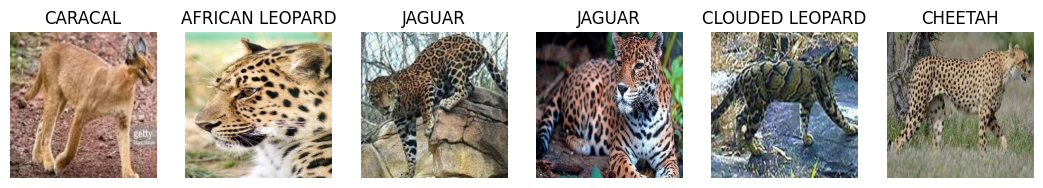

==== Image Size Distribution (Train) ====

Image size statistics (train set):

Mean     : width 224.0, height 224.0
Median   : width 224.0, height 224.0
Std dev  : width 0.0, height 0.0


In [46]:
import os
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

base_dir = "/content/big_cats"

train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir  = os.path.join(base_dir, "test")

random.seed(42)

print("============= Exploratory Data Analysis =============\n")

# Classes
train_tmp = ImageFolder(train_dir)
classes = train_tmp.classes
print("==== Classes of Big Cats ====\n")
print(classes)

# Counts per split & class
def count_images(root):
    per_class = {}
    for cls in os.listdir(root):
        cls_path = os.path.join(root, cls)
        if os.path.isdir(cls_path):
            per_class[cls] = len(os.listdir(cls_path))
    return per_class, sum(per_class.values())

print("\n==== Count in Split and Classes ====")
for name, d in [("Train", train_dir), ("Valid", valid_dir), ("Test", test_dir)]:
    per_class, total = count_images(d)
    print(f"\n{name} — {total} images total")
    for cls, n in per_class.items():
        print(f"  {cls}: {n}")

# ==== Random samples from train
print("==== Show Samples (Train) ====\n")

sample_ds = ImageFolder(train_dir)

def show_random_samples(dataset, n=6):
    idxs = random.sample(range(len(dataset)), n)
    plt.figure(figsize=(n*2.2, 3))
    for i, idx in enumerate(idxs):
        img, label = dataset[idx]
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(dataset.classes[label])
        plt.axis("off")
    plt.show()

show_random_samples(sample_ds, n=6)

# Image size distribution train
print("==== Image Size Distribution (Train) ====\n")

sizes = []
for cls in os.listdir(train_dir):
    cls_path = os.path.join(train_dir, cls)
    if os.path.isdir(cls_path):
        for img_name in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img_name)
            try:
                with Image.open(img_path) as img:
                    sizes.append(img.size)
            except:
                pass

sizes = np.array(sizes)
widths = sizes[:, 0]
heights = sizes[:, 1]

print("Image size statistics (train set):\n")
print(f"Mean     : width {widths.mean():.1f}, height {heights.mean():.1f}")
print(f"Median   : width {np.median(widths):.1f}, height {np.median(heights):.1f}")
print(f"Std dev  : width {widths.std():.1f}, height {heights.std():.1f}")


### EDA Conclusions:

The dataset includes 10 balanced big-cat classes across all splits.

Train set has 2339 images; validation and test each have 50 images with 5 per class.

Images are already uniformly sized (224×224) with no variation, so no resizing analysis is needed.

Sample visuals confirm correct labeling and clean data.

## CNN Model

### Imports and Dataset

In [47]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import torch.optim as optim
import torch.nn as nn
import copy

def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


class BigCatDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        root_dir: path to 'train', 'valid' or 'test' folder.
                  Inside it: one subfolder per class with images.
        """
        self.root_dir = root_dir
        self.transform = transform

        self.classes = sorted([
            d for d in os.listdir(root_dir)
            if os.path.isdir(os.path.join(root_dir, d))])

        # build list of (path, label)
        self.samples = []
        for class_idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            for fname in os.listdir(class_dir):
                if fname.lower().endswith((".jpg", ".jpeg", ".png")):
                    self.samples.append((os.path.join(class_dir, fname), class_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        img_path, label = self.samples[index]
        img = Image.open(img_path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, label

    def get_class(self, idx):
        return self.classes[idx]


### Transforms

In [48]:
train_transform = transforms.Compose([
    transforms.Resize((72, 72)),
    transforms.RandomResizedCrop(64, scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.02),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

val_test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])



### Load Data

In [49]:
DATA_DIR = "/content/big_cats"

train_dataset = BigCatDataset(os.path.join(DATA_DIR, "train"), transform=train_transform)
val_dataset   = BigCatDataset(os.path.join(DATA_DIR, "valid"), transform=val_test_transform)
test_dataset  = BigCatDataset(os.path.join(DATA_DIR, "test"),  transform=val_test_transform)

BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False)

num_classes = len(train_dataset.classes)
print("Classes:", train_dataset.classes)
print("Train size:", len(train_dataset), "Val size:", len(val_dataset), "Test size:", len(test_dataset))


Classes: ['AFRICAN LEOPARD', 'CARACAL', 'CHEETAH', 'CLOUDED LEOPARD', 'JAGUAR', 'LIONS', 'OCELOT', 'PUMA', 'SNOW LEOPARD', 'TIGER']
Train size: 2339 Val size: 50 Test size: 50


### CNN Model

In [50]:
class BigCatsCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(BigCatsCNN, self).__init__()

        self.features = nn.Sequential(
            # Block 1: 64 -> 32
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 64 -> 32

            # Block 2: 32 -> 16
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 32 -> 16

            # Block 3: 16 -> 8
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 16 -> 8

            # Block 4: 8 -> 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),  # 8 -> 4

            # Global average pooling to reduce parameters
            nn.AdaptiveAvgPool2d((1, 1))   # -> (B, 256, 1, 1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),                  # (B, 256)
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(256, num_classes),
            nn.LogSoftmax(dim=1),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x



In [51]:
set_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

model = BigCatsCNN(num_classes=num_classes).to(device)

criterion = nn.NLLLoss()  # using LogSoftmax in the model

# Adam with a bit of L2 regularization
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# LR scheduler: decay LR to fine-tune later
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.3)

num_params = sum(p.numel() for p in model.parameters())
print("Number of parameters:", num_params)



Number of parameters: 1242538


In [ ]:
num_epochs = 50  # still 50, but stronger model + aug

train_loss_hist = []
val_loss_hist = []
train_acc_hist = []
val_acc_hist = []

best_val_acc = 0.0
best_state_dict = copy.deepcopy(model.state_dict())
best_epoch = 0

for epoch in range(num_epochs):
    # ---- Train ----
    model.train()
    running_loss = 0.0
    running_correct = 0
    running_total = 0

    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)
        running_correct += (preds == labels).sum().item()
        running_total += labels.size(0)

    epoch_train_loss = running_loss / running_total
    epoch_train_acc = running_correct / running_total

    # ---- Validation ----
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            preds = outputs.argmax(dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    epoch_val_loss = val_loss / val_total
    epoch_val_acc = val_correct / val_total

    train_loss_hist.append(epoch_train_loss)
    val_loss_hist.append(epoch_val_loss)
    train_acc_hist.append(epoch_train_acc)
    val_acc_hist.append(epoch_val_acc)

    # Step LR scheduler
    scheduler.step()

    # Track best model
    if epoch_val_acc > best_val_acc:
        best_val_acc = epoch_val_acc
        best_state_dict = copy.deepcopy(model.state_dict())
        best_epoch = epoch + 1

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {epoch_train_loss:.4f} Acc: {epoch_train_acc:.3f} | "
          f"Val Loss: {epoch_val_loss:.4f} Acc: {epoch_val_acc:.3f}")

print(f"\nBest validation accuracy: {best_val_acc:.3f} at epoch {best_epoch}")
model.load_state_dict(best_state_dict)



Epoch [1/50] Train Loss: 1.9478 Acc: 0.256 | Val Loss: 3.4889 Acc: 0.160
Epoch [2/50] Train Loss: 1.7290 Acc: 0.327 | Val Loss: 1.9483 Acc: 0.300
Epoch [3/50] Train Loss: 1.6313 Acc: 0.350 | Val Loss: 2.2294 Acc: 0.220
Epoch [4/50] Train Loss: 1.5972 Acc: 0.367 | Val Loss: 1.7032 Acc: 0.480
Epoch [5/50] Train Loss: 1.5315 Acc: 0.401 | Val Loss: 2.0527 Acc: 0.320
Epoch [6/50] Train Loss: 1.4683 Acc: 0.428 | Val Loss: 1.3473 Acc: 0.540
Epoch [7/50] Train Loss: 1.4122 Acc: 0.449 | Val Loss: 1.3834 Acc: 0.560
Epoch [8/50] Train Loss: 1.3328 Acc: 0.465 | Val Loss: 1.4187 Acc: 0.520
Epoch [9/50] Train Loss: 1.2818 Acc: 0.482 | Val Loss: 1.1602 Acc: 0.560
Epoch [10/50] Train Loss: 1.2261 Acc: 0.525 | Val Loss: 1.2431 Acc: 0.500
Epoch [11/50] Train Loss: 1.1510 Acc: 0.552 | Val Loss: 1.5664 Acc: 0.480
Epoch [12/50] Train Loss: 1.1744 Acc: 0.535 | Val Loss: 1.1787 Acc: 0.560
Epoch [13/50] Train Loss: 1.0720 Acc: 0.591 | Val Loss: 1.6221 Acc: 0.500
Epoch [14/50] Train Loss: 0.9878 Acc: 0.626 | V

### Plot

In [ ]:
epochs = range(1, num_epochs + 1)

plt.figure()
plt.plot(epochs, train_loss_hist, label="Train Loss")
plt.plot(epochs, val_loss_hist, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, train_acc_hist, label="Train Acc")
plt.plot(epochs, val_acc_hist, label="Val Acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()
plt.show()



In [ ]:
model.load_state_dict(best_state_dict)

### Test Acuuracy

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_acc = correct / total
print(f"Test Accuracy: {test_acc:.3f}")


### Saving

In [ ]:
%%writefile Hw1_211644240_318801792_q4.py

class BigCatsCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(BigCatsCNN, self).__init__()

        self.features = nn.Sequential(
            # Block 1: 64 -> 32
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            # Block 2: 32 -> 16
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),

            # Block 3: 16 -> 8
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),

            # Block 4: 8 -> 4
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(256, num_classes),
            nn.LogSoftmax(dim=1),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [ ]:
torch.save(model.state_dict(), "Hw1_211644240_318801792_q4.pkl")